In [621]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import math

tf.random.set_seed(42)

data = '220119'
dataname = data+'_2'
filename = 'myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:12]
SensorData = SD

In [622]:
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,z,x,y
0,179.06,190.79,205.21,183.32,207.50,220.30,198.96,211.48,167.74,1.2,0,0
1,175.43,183.03,204.10,194.21,201.38,213.40,198.96,210.12,171.73,1.2,0,0
2,181.48,186.91,205.21,188.16,203.42,224.90,195.98,211.48,174.39,1.2,0,0
3,174.22,184.00,204.10,193.00,204.44,219.15,190.02,207.40,169.07,1.2,0,0
4,177.85,184.00,205.21,194.21,203.42,216.85,200.45,208.76,174.39,1.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
236891,187.53,174.30,193.00,178.48,192.20,211.10,193.00,212.84,166.41,2.4,96,72
236892,186.32,172.36,187.45,177.27,193.22,209.95,190.02,210.12,170.40,2.4,96,72
236893,187.53,171.39,193.00,182.11,191.18,208.80,195.98,215.56,171.73,2.4,96,72
236894,186.32,174.30,189.67,176.06,194.24,209.95,185.55,214.20,171.73,2.4,96,72


In [623]:
SD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,z,x,y
count,236896.000000,236896.000000,236896.000000,236896.000000,236896.000000,236896.000000,236896.000000,236896.000000,236896.000000,236896.000000,236896.000000,236896.000000
mean,180.879193,174.914443,197.641837,189.446544,197.422919,213.376815,193.072891,211.842240,166.949908,1.800023,48.003563,36.000709
std,5.181958,3.605161,3.564639,4.540395,3.653628,6.276074,5.781775,5.221281,3.847657,0.424295,28.845971,21.634467
min,154.860000,156.840000,184.120000,172.430000,184.040000,190.400000,161.710000,173.400000,147.790000,1.200000,0.000000,0.000000
25%,177.850000,172.360000,195.220000,186.950000,195.260000,208.800000,190.020000,208.760000,165.080000,1.500000,24.000000,18.000000
50%,181.480000,175.270000,197.440000,189.370000,197.300000,213.400000,193.000000,211.480000,167.740000,1.800000,48.000000,36.000000
75%,185.110000,177.210000,200.770000,193.000000,200.360000,216.850000,197.470000,215.560000,169.070000,2.100000,72.000000,54.000000
max,198.420000,209.220000,209.650000,208.730000,210.560000,264.000000,213.860000,234.600000,187.690000,2.400000,96.000000,72.000000


In [624]:
SDext =SD.copy() # SensorData[SensorData['z']==0]
maskX = SDext["x"].isin(list(range(0,100,4)))
maskY = SDext["y"].isin(list(range(0,75,3)))
maskZ = SDext["z"].isin([1.8,2.1,2.4])
SD = SDext[maskX &  maskZ & maskZ]
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,z,x,y
152,171.80,185.94,204.10,190.58,202.40,224.90,193.00,207.40,166.41,1.8,0,0
153,173.01,187.88,205.21,186.95,204.44,221.45,190.02,208.76,170.40,1.8,0,0
154,173.01,184.00,204.10,186.95,207.50,216.85,188.53,207.40,169.07,1.8,0,0
155,174.22,178.18,199.66,193.00,204.44,216.85,195.98,211.48,167.74,1.8,0,0
156,175.43,179.15,205.21,190.58,201.38,216.85,194.49,211.48,171.73,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
236891,187.53,174.30,193.00,178.48,192.20,211.10,193.00,212.84,166.41,2.4,96,72
236892,186.32,172.36,187.45,177.27,193.22,209.95,190.02,210.12,170.40,2.4,96,72
236893,187.53,171.39,193.00,182.11,191.18,208.80,195.98,215.56,171.73,2.4,96,72
236894,186.32,174.30,189.67,176.06,194.24,209.95,185.55,214.20,171.73,2.4,96,72


In [625]:
len(list(range(8,92,16)))

6

In [626]:
len(list(range(6,72,12)))

6

<AxesSubplot:>

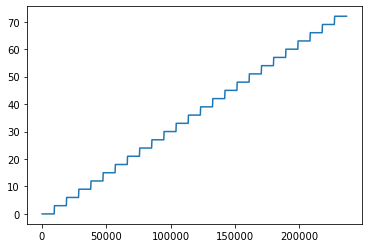

In [627]:
SDz=(SD.loc[:,'y'])
SDz.plot()

In [628]:
import numpy as np
SD['x'] = (SD['x']-SD['x'].mean())/(SD['x'].std())
SD['y'] = (SD['y']-SD['y'].mean())/(SD['y'].std())
SD['z'] = (SD['z']-SD['z'].mean())/(SD['z'].std())

<ipython-input-628-5fb4cd640004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['x'] = (SD['x']-SD['x'].mean())/(SD['x'].std())
<ipython-input-628-5fb4cd640004>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SD['y'] = (SD['y']-SD['y'].mean())/(SD['y'].std())
<ipython-input-628-5fb4cd640004>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

In [629]:
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,z,x,y
152,171.80,185.94,204.10,190.58,202.40,224.90,193.00,207.40,166.41,-1.22504,-1.664170,-1.664204
153,173.01,187.88,205.21,186.95,204.44,221.45,190.02,208.76,170.40,-1.22504,-1.664170,-1.664204
154,173.01,184.00,204.10,186.95,207.50,216.85,188.53,207.40,169.07,-1.22504,-1.664170,-1.664204
155,174.22,178.18,199.66,193.00,204.44,216.85,195.98,211.48,167.74,-1.22504,-1.664170,-1.664204
156,175.43,179.15,205.21,190.58,201.38,216.85,194.49,211.48,171.73,-1.22504,-1.664170,-1.664204
...,...,...,...,...,...,...,...,...,...,...,...,...
236891,187.53,174.30,193.00,178.48,192.20,211.10,193.00,212.84,166.41,1.22454,1.663885,1.664056
236892,186.32,172.36,187.45,177.27,193.22,209.95,190.02,210.12,170.40,1.22454,1.663885,1.664056
236893,187.53,171.39,193.00,182.11,191.18,208.80,195.98,215.56,171.73,1.22454,1.663885,1.664056
236894,186.32,174.30,189.67,176.06,194.24,209.95,185.55,214.20,171.73,1.22454,1.663885,1.664056


In [630]:
SD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,z,x,y
count,142135.000000,142135.000000,142135.000000,142135.000000,142135.000000,142135.000000,142135.000000,142135.000000,142135.000000,1.421350e+05,1.421350e+05,1.421350e+05
mean,179.488427,173.924202,196.409204,187.978621,196.119338,212.043358,192.210033,210.582190,166.215752,7.631586e-12,3.690593e-14,-4.644357e-14
std,5.039653,3.414756,3.441404,4.402505,3.431003,6.156241,5.699613,5.157463,3.870095,1.000000e+00,1.000000e+00,1.000000e+00
min,154.860000,156.840000,184.120000,172.430000,184.040000,190.400000,161.710000,173.400000,147.790000,-1.225040e+00,-1.664170e+00,-1.664204e+00
25%,176.640000,171.390000,194.110000,184.530000,193.220000,207.650000,188.530000,207.400000,163.750000,-1.225040e+00,-8.321560e-01,-8.321392e-01
50%,180.270000,174.300000,196.330000,188.160000,196.280000,211.100000,193.000000,210.120000,166.410000,-2.498956e-04,-1.424397e-04,-7.415127e-05
75%,182.690000,176.240000,198.550000,191.790000,198.320000,215.700000,195.980000,214.200000,169.070000,1.224540e+00,8.318712e-01,8.319909e-01
max,197.210000,198.550000,208.540000,205.100000,208.520000,264.000000,210.880000,234.600000,187.690000,1.224540e+00,1.663885e+00,1.664056e+00


In [631]:
SDy = SD.iloc[:,9:12]
SDy.describe()

,z,x,y
count,1.421350e+05,1.421350e+05,1.421350e+05
mean,7.631586e-12,3.690593e-14,-4.644357e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.225040e+00,-1.664170e+00,-1.664204e+00
25%,-1.225040e+00,-8.321560e-01,-8.321392e-01
50%,-2.498956e-04,-1.424397e-04,-7.415127e-05
75%,1.224540e+00,8.318712e-01,8.319909e-01
max,1.224540e+00,1.663885e+00,1.664056e+00


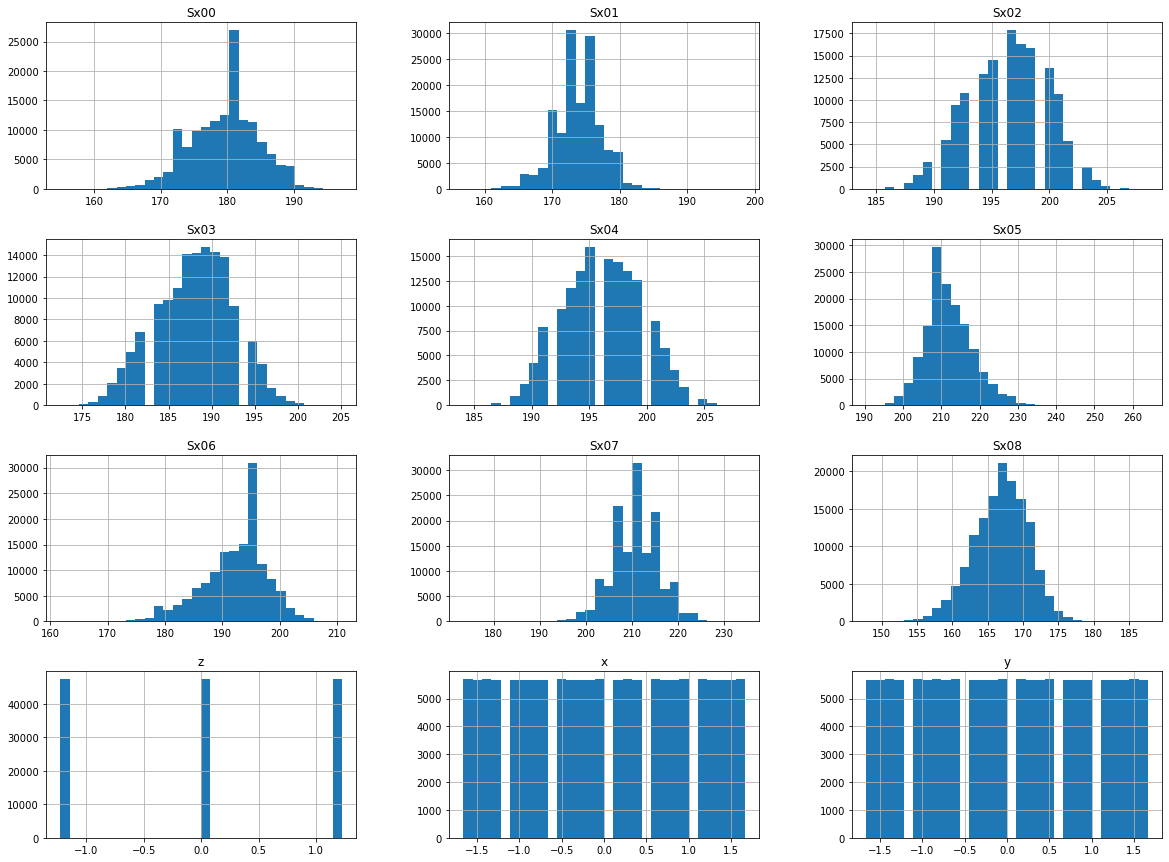

In [632]:
%matplotlib inline
import matplotlib.pyplot as plt
SD.hist(bins= 30, figsize=(20,15))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/Screen/savefig/'+dataname+'_hist.png')
plt.show()

In [633]:
#for i in range(0,24):
#    SD.plot(kind="scatter", x= "theta_enc",y= "Sx"+format(i,'02X'),alpha = 0.1)    

In [634]:
X = SD.iloc[:,:9]
y = SD.iloc[:,10:12]

In [635]:
X

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08
152,171.80,185.94,204.10,190.58,202.40,224.90,193.00,207.40,166.41
153,173.01,187.88,205.21,186.95,204.44,221.45,190.02,208.76,170.40
154,173.01,184.00,204.10,186.95,207.50,216.85,188.53,207.40,169.07
155,174.22,178.18,199.66,193.00,204.44,216.85,195.98,211.48,167.74
156,175.43,179.15,205.21,190.58,201.38,216.85,194.49,211.48,171.73
...,...,...,...,...,...,...,...,...,...
236891,187.53,174.30,193.00,178.48,192.20,211.10,193.00,212.84,166.41
236892,186.32,172.36,187.45,177.27,193.22,209.95,190.02,210.12,170.40
236893,187.53,171.39,193.00,182.11,191.18,208.80,195.98,215.56,171.73
236894,186.32,174.30,189.67,176.06,194.24,209.95,185.55,214.20,171.73


In [636]:
y.sample(5)

,x,y
182679,-0.832156,0.970668
105292,-1.386832,-0.138752
69665,-0.554818,-0.693462
42822,-0.000142,-1.109494
228475,-1.386832,1.664056


In [637]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.01, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

In [638]:
X_sum = len(X_train)+len(X_valid)+len(X_test)
X_train_per = int(len(X_train)/X_sum*100)
X_valid_per = int(len(X_valid)/X_sum*100)
X_test_per = int(len(X_test)/X_sum*100)

print('X_train: ',len(X_train),'ea',X_train_per,'%   ', 
      'X_valid: ',len(X_valid),'ea',X_valid_per,'%   ',
      'X_test: ',len(X_test),'ea',X_test_per,'%',)

X_train:  112570 ea 79 %    X_valid:  28143 ea 19 %    X_test:  1422 ea 1 %


In [639]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [640]:
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/220119_2_SS.pkl']

In [641]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(256, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(8, activation="relu", input_shape=X_train.shape[1:],kernel_initializer = "he_normal"),
    keras.layers.BatchNormalization(),    
    keras.layers.Dense(2)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3, momentum = 0.9,nesterov = True))
# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.RMSprop(learning_rate=1e-3, rho = 0.9))

In [642]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 256)               2560      
_________________________________________________________________
batch_normalization_88 (Batc (None, 256)               1024      
_________________________________________________________________
dense_250 (Dense)            (None, 256)               65792     
_________________________________________________________________
batch_normalization_89 (Batc (None, 256)               1024      
_________________________________________________________________
dense_251 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_90 (Batc (None, 128)               512       
_________________________________________________________________
dense_252 (Dense)            (None, 128)             

## Callback (best, early stopping, tensorboard)

In [643]:
import os 
root_logdir = os.path.join(os.curdir, 'mylog/'+data)

def get_run_logdir():
    import time
    run_id= time.strftime("%m%d_%Hh%Mm%Ss"+dataname)
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [644]:
K = keras.backend
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)

In [645]:
dataname

'220119_2'

In [646]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)
n_epochs = 300
batch_size = 1
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle,early_stopping_cb,tensorboard_cb])
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:5]
y_pred = model.predict(X_new)

Epoch 1/300
3518/3518 [==============================] - 17s 4ms/step - loss: 0.2491 - val_loss: 0.1623
Epoch 2/300
3518/3518 [==============================] - 14s 4ms/step - loss: 0.2108 - val_loss: 0.1571
Epoch 3/300
3518/3518 [==============================] - 14s 4ms/step - loss: 0.2070 - val_loss: 0.1564
Epoch 4/300
3518/3518 [==============================] - 13s 4ms/step - loss: 0.2032 - val_loss: 0.1551
Epoch 5/300
3518/3518 [==============================] - 14s 4ms/step - loss: 0.2017 - val_loss: 0.1537
Epoch 6/300
3518/3518 [==============================] - 14s 4ms/step - loss: 0.2009 - val_loss: 0.1529
Epoch 7/300
3518/3518 [==============================] - 13s 4ms/step - loss: 0.1992 - val_loss: 0.1524
Epoch 8/300
3518/3518 [==============================] - 13s 4ms/step - loss: 0.1977 - val_loss: 0.1572
Epoch 9/300
3518/3518 [==============================] - 13s 4ms/step - loss: 0.1963 - val_loss: 0.1538
Epoch 10/300
3518/3518 [==============================] - 13s 4m

In [597]:
%load_ext tensorboard
%tensorboard --logdir=./mylog/220119 --port=119

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 119 (pid 45308), started 1:21:51 ago. (Use '!kill 45308' to kill it.)

In [598]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/Screen/myModel/'+dataname+'.h5')

In [610]:
model = tf.keras.models.load_model('myModel/'+dataname+'.h5')
scaler = load(file_name)
valid_predictions = model.predict(X_valid)

In [611]:
X_valid

array([[ 1.71309169, -0.33553275, -2.10198719, ...,  0.73288294,
        -1.02468051, -0.53809225],
       [ 0.0416658 , -0.62095233,  1.09872   , ..., -1.0932925 ,
         1.61118646,  0.1422649 ],
       [ 0.51921605,  0.52072599,  1.09872   , ..., -1.0932925 ,
         1.08401307,  0.1422649 ],
       ...,
       [ 0.28044093,  0.52072599,  0.45857856, ..., -1.3541747 ,
        -1.02468051, -1.55862797],
       [ 0.28044093,  0.23530641,  0.77864928, ...,  1.25464735,
         0.02966628, -0.53809225],
       [ 0.0416658 , -1.19179148, -1.78191647, ...,  0.47200073,
        -1.02468051,  0.48244347]])

In [612]:
valid_predictions

array([[ 1.4234303 ,  0.26641044],
       [-1.1858269 ,  1.0876952 ],
       [-1.2195228 ,  0.86570835],
       ...,
       [ 0.4200239 , -1.5096697 ],
       [-0.15401325, -0.91668653],
       [ 1.2663994 ,  0.3925135 ]], dtype=float32)

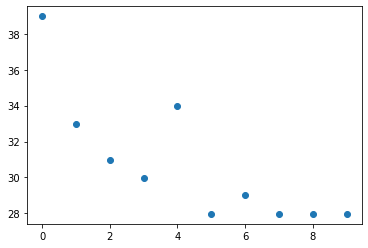

In [613]:
import time
arr = X_test
X_test0 = arr[:1]
X_test0
n = 10
a = np.zeros(n)
for i in range(0,n):
    Prev_time = time.time()
    test_predictions = model.predict(X_test0)
    cal_time = round((time.time()-Prev_time)*1000,2)
    a[i] = cal_time
b= range(0,n)
plt.scatter(b,a,alpha = 1)

In [614]:
X_test[0]

array([-0.43588445,  0.23530641, -1.46184575, -1.17561859, -1.5652515 ,
        1.42418344,  0.99376514, -0.23392042, -0.53809225])

In [615]:
arr = X_test
X_test0 = arr[:1]
X_test0

array([[-0.43588445,  0.23530641, -1.46184575, -1.17561859, -1.5652515 ,
         1.42418344,  0.99376514, -0.23392042, -0.53809225]])

In [616]:
valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_theta","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_r","valid_theta","valid_z"]
valid_predictions_df.columns = ["valid_x","valid_y"]
#valid_predictions_df.columns = ["valid_theta","valid_z"]
#valid_predictions_df.columns = ["valid_z"]
#valid_predictions_df.columns = ["valid_theta"]


valid_predictions_df

,valid_x,valid_y
0,1.423430,0.266410
1,-1.185827,1.087695
2,-1.219523,0.865708
3,-1.270502,-0.621365
4,-0.710391,1.171038
...,...,...
18761,-0.125450,1.359500
18762,0.498059,-1.191517
18763,0.420024,-1.509670
18764,-0.154013,-0.916687


In [617]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
#k_df.columns = ["theta_enc","z","cos","sin"]
#k_df.columns  = ["z","cos","sin"]
#k_df.columns = ["r","theta_enc","z"]
k_df.columns  = ["x","y"]
#k_df.columns  = ["theta_enc","z"]
#k_df.columns  = ["z"]
#k_df.columns  = ["theta_enc"]
k_df

,x,y
0,1.386829,-0.554880
1,-1.248090,1.248029
2,-1.386770,0.831973
3,-1.525450,-0.832251
4,-0.416011,1.386715
...,...,...
18761,-0.277331,1.109344
18762,0.277389,-1.248307
18763,-0.416011,-1.248307
18764,-0.138651,-0.832251


In [618]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
for i in range(0,2):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr

corr
94.49% x
91.78% y


,x,y,valid_x,valid_y
x,1.000000,-0.005458,0.944921,0.010100
y,-0.005458,1.000000,0.028071,0.917755
valid_x,0.944921,0.028071,1.000000,0.029268
valid_y,0.010100,0.917755,0.029268,1.000000


In [619]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(ValidPre,figsize=(40,40))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/210913_70ms_3ea_scatter.png')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='y', ylabel='valid_y'>

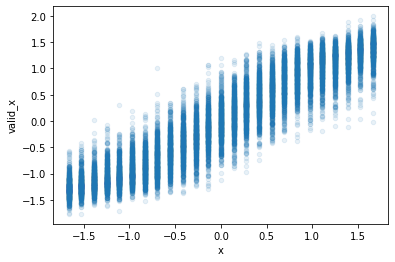

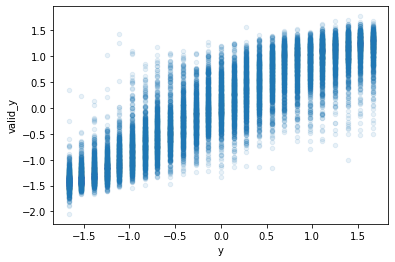

In [620]:
#ValidPre.plot(kind="scatter", x= "r",y= "valid_r",alpha = 0.1)
#ValidPre.plot(kind="scatter", x= "theta_enc",y= "valid_theta",alpha = 0.1)
#ValidPre.plot(kind="scatter", x= "z",y= "valid_z",alpha = 0.1)
ValidPre.plot(kind="scatter", x= "x",y= "valid_x",alpha = .1)
ValidPre.plot(kind="scatter", x= "y",y= "valid_y",alpha = .1)
#ValidPre.plot(kind="scatter", x= "valid_cos",y= "valid_sin",alpha = 0.1)
#plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/210903_70ms_3ea_sin.png')